# Algorithms Homework 2

In [1]:
## Load libraries
import matplotlib as plat
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sympy as sym
# from sympy import symbols, diff

## Finite Difference Approximations

**Main Idea**: Explore the accuracy of the finite difference approximation for $\nabla f(x)$ and $\nabla^2 f(x)$ from Example 2.19.

### Finite difference order

Repeat the analysis from class to show the backward and central finite difference truncations errors are $\mathcal{O}(\epsilon)$ and $\mathcal{O}(\epsilon^2)$, respectively. We discussed these error orders graphically. Please use a Taylor series for your analysis.

### Provided Codes

Please review the following code. You do not need to turn anything in for this section.

#### Finite Difference Code

The code below has been adapted from the finite difference examples presented in class. Notice the second input is a function.

In [2]:
## Define Python function
def my_f(x,verbose=False):
    ''' Evaluate function given above at point x

    Inputs:
        x - vector with 2 elements
        
    Outputs:
        f - function value (scalar)
    '''
    # Constants
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    c = np.array([40, 1, 10])
    
    # Intermediates. Recall Python indicies start at 0
    u = x[0] - 0.8
    s = np.sqrt(1-u)
    s2 = np.sqrt(1+u)
    v = x[1] -(a[0] + a[1]*u**2*s-a[2]*u)
    alpha = -b[0] + b[1]*u**2*s2+ b[2]*u 
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    
    if verbose:
        print("##### my_f at x = ",x, "#####")
        print("u = ",u)
        print("sqrt(1-u) = ",s)
        print("sqrt(1+u) = ",s2)
        print("v = ",v)
        print("alpha = ",alpha)
        print("beta = ",beta)
        print("f(x) = ",)
        print("##### Done. #####\n")
    
    return alpha*np.exp(-beta)

## Calculate gradient with central finite difference
def my_grad_approx(x,f,eps1,verbose=False):
    '''
    Calculate gradient of function my_f using central difference formula
    
    Inputs:
        x - point for which to evaluate gradient
        f - function to consider
        eps1 - perturbation size
        
    Outputs:
        grad - gradient (vector)
    '''
    
    n = len(x)
    grad = np.zeros(n)
    
    if(verbose):
        print("***** my_grad_approx at x = ",x,"*****")
    
    for i in range(0,n):
        
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps1
        
        # Finite difference formula
        my_f_plus = f(x + e)
        my_f_minus = f(x - e)
        
        # Diagnostics
        if(verbose):
            print("e[",i,"] = ",e)
            print("f(x + e[",i,"]) = ",my_f_plus)
            print("f(x - e[",i,"]) = ",my_f_minus)
        
        
        grad[i] = (my_f_plus - my_f_minus)/(2*eps1)
    
    if(verbose):
        print("***** Done. ***** \n")
    
    return grad

## Calculate gradient using central finite difference and my_hes_approx
def my_hes_approx(x,grad,eps2):
    '''
    Calculate gradient of function my_f using central difference formula and my_grad
    
    Inputs:
        x - point for which to evaluate gradient
        grad - function to calculate the gradient
        eps2 - perturbation size (for Hessian NOT gradient approximation)
        
    Outputs:
        H - Hessian (matrix)
    '''
    
    n = len(x)
    H = np.zeros([n,n])
    
    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps2
        
        # Evaluate gradient twice
        grad_plus = grad(x + e)
        grad_minus = grad(x - e)
        
        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps2)

    return H

In [3]:
### Test the functions from above

## Define test point
xt = np.array([0,0])
print("xt = ",xt,"\n")

print("f(xt) = \n",my_f([0,0]),"\n")

## Compute gradient
g = my_grad_approx(xt,my_f,1E-6)
print("grad(xt) = ",g,"\n")

## Compute Hessian
# Step 1: Create a Lambda (anonymous) function
calc_grad = lambda x : my_grad_approx(x,my_f,1E-6)

# Step 2: Calculate Hessian approximation
H = my_hes_approx(xt,calc_grad,1E-6)
print("hes(xt) = \n",H,"\n")

xt =  [0 0] 

f(xt) = 
 1.6212212164426274e-06 

grad(xt) =  [1.49885593e-04 4.20936251e-05] 

hes(xt) = 
 [[0.00082024 0.00387044]
 [0.00387044 0.00102412]] 



#### Analytic Gradient

It turns out that calculating the analytic gradient with Mathematic quickly becomes a mess. Instead, the  following code uses the symbolic computing capabilities in SymPy.

In [4]:
'''
Encoding the exact gradient with the long expression above is very time-consuming. This is a trick of calculating the 
symbolic derivative and converting it to an analytic function to be evaluated at a point. 
'''

# Define function to use with symbolic computing framework
def f(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

# Define function to use later
def my_grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])
    
x = np.array([0,0])
print("The exact gradient is \n",my_grad_exact(x))

The exact gradient is 
 [1.49885593e-04 4.20936251e-05]


#### Analytic Hessian

The code below assembles the analytic Hessian using the symbolic computing framework in NumPy.

In [5]:
def f(x1,x2):
    
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


def my_hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])
    
x = np.array([0,0])
print("The exact Hessian is \n",my_hes_exact(x))    

The exact Hessian is 
 [[0.00082025 0.00387044]
 [0.00387044 0.00102412]]


### Gradient Finite Difference Comparison

Repeat the analysis procedure from the finite difference class notebook to find the value of $\epsilon_1$ that gives the smallest approximation error. Some tips:
1. Write a `for` loop to iterate over many values of $\epsilon_1$
2. Use $|| \nabla f(x;\epsilon_1)_{approx} - \nabla f(x)_{exact} ||$ to measure the error. Your choice on which norm(s) to use. Please label your plot with the norm(s) you used.
3. Make a log-log plot

lowest error eps1: 1e-06


/tmp/ipykernel_67960/3625385114.py:18: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(1-u)
/tmp/ipykernel_67960/3625385114.py:19: RuntimeWarning: invalid value encountered in sqrt
  s2 = np.sqrt(1+u)
/tmp/ipykernel_67960/3625385114.py:35: RuntimeWarning: overflow encountered in exp
  return alpha*np.exp(-beta)


Text(0.5, 0, '$\\varepsilon$')

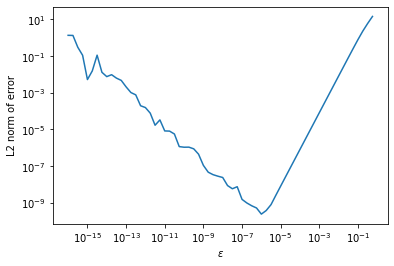

In [6]:
# Add your solution here
x = np.array([1,0.6])
eps1 = np.power(10,np.arange(-16,1,0.25))
grad_f_approx = np.zeros([len(x),len(eps1)])
grad_f_exact = my_grad_exact(x)
err = 0*eps1

for i in np.arange(len(eps1)):
    grad_f_approx[:,i] = my_grad_approx(x,my_f,eps1[i],verbose = False) 
    err[i] = np.linalg.norm(grad_f_approx[:,i] - grad_f_exact)

min_eps1 = eps1[int(np.where(err == min(err))[0])]
print('lowest error eps1:', min_eps1)
plt.loglog(eps1, err)
plt.ylabel('L2 norm of error')
plt.xlabel(r'$\varepsilon$')

### Hessian Finite Difference using Approximate Gradient

Repeat the analysis from above. Use `my_grad_approx` and the best value for $\epsilon_1$ you previously found. What value of $\epsilon_2$ gives the lowest Hessian approximation error? Note: $\epsilon_1$ is used in the gradient approximation and $\epsilon_2$ is used in the Hessian approximation.

lowest error eps2: 5.623413251903491e-05


/tmp/ipykernel_67960/3625385114.py:18: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(1-u)
/tmp/ipykernel_67960/3625385114.py:19: RuntimeWarning: invalid value encountered in sqrt
  s2 = np.sqrt(1+u)
/tmp/ipykernel_67960/3625385114.py:35: RuntimeWarning: overflow encountered in exp
  return alpha*np.exp(-beta)
/tmp/ipykernel_67960/3625385114.py:74: RuntimeWarning: invalid value encountered in double_scalars
  grad[i] = (my_f_plus - my_f_minus)/(2*eps1)


Text(0.5, 0, '$\\varepsilon$')

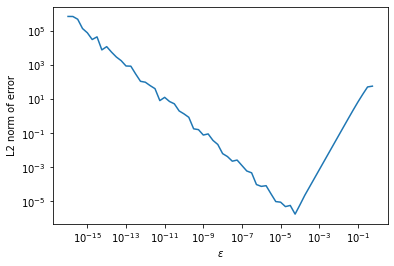

In [7]:
# Add your solution here

# initialize FE discretization
eps2 = np.power(10, np.arange(-16, 1, 0.25))

# create a Lambda function for gradient approximation
calc_grad = lambda x : my_grad_approx(x,my_f,min_eps1)

# compute exact Hessian
hess_exact = my_hes_exact(x)

# intialize error
err = 0*eps2

# loop over different FE discretizations
for i in np.arange(len(eps2)):
    
    # calculate Hessian approximation
    H = my_hes_approx(x, calc_grad, eps2[i])
    
    # calculate error
    err[i] = np.linalg.norm(H - hess_exact)

# find optimal FE discretization
min_eps2 = eps2[int(np.where(err == min(err))[0])]
print('lowest error eps2:', min_eps2)

# plot
plt.loglog(eps2, err)
plt.ylabel('L2 norm of error')
plt.xlabel(r'$\varepsilon$')

### Hessian Finite Difference using Exact Gradient

Repeat the analysis from above using `my_grad_exact`. What value of $\epsilon_2$ gives the lower Hessian approximation error?

<lambdifygenerated-529>:2: RuntimeWarning: invalid value encountered in sqrt
  return (3*x1 + 26*(x1 - 0.8)**2*sqrt(x1 + 0.2) - 7.4)*(-40*(16.0 - 20*x1)*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 + 1.46)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)**2/(10*(x1 - 0.8)**2 + 1)**2 - 40*(-0.223606797749979*(1 - 0.555555555555556*x1)**(-0.5)*(x1 - 0.8)**2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(2*x1 - 1.6) - 0.2)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)**2/(10*(x1 - 0.8)**2 + 1) - 40*(0.447213595499958*(1 - 0.555555555555556*x1)**(-0.5)*(x1 - 0.8)**2 - 1.60996894379985*sqrt(1 - 0.555555555555556*x1)*(2*x1 - 1.6) + 0.4)*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 + 1.46)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)/(10*(x1 - 0.8)**2 + 1))*exp(-40*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1

<lambdifygenerated-545>:2: RuntimeWarning: invalid value encountered in sqrt
  return (3*x1 + 26*(x1 - 0.8)**2*sqrt(x1 + 0.2) - 7.4)*(-40*(16.0 - 20*x1)*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 + 1.46)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)**2/(10*(x1 - 0.8)**2 + 1)**2 - 40*(-0.223606797749979*(1 - 0.555555555555556*x1)**(-0.5)*(x1 - 0.8)**2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(2*x1 - 1.6) - 0.2)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)**2/(10*(x1 - 0.8)**2 + 1) - 40*(0.447213595499958*(1 - 0.555555555555556*x1)**(-0.5)*(x1 - 0.8)**2 - 1.60996894379985*sqrt(1 - 0.555555555555556*x1)*(2*x1 - 1.6) + 0.4)*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 + 1.46)*(0.2*x1 + x2 - 0.804984471899924*sqrt(1 - 0.555555555555556*x1)*(x1 - 0.8)**2 - 0.46)/(10*(x1 - 0.8)**2 + 1))*exp(-40*(-0.2*x1 - x2 + 0.804984471899924*sqrt(1

lowest error eps2: 1.778279410038923e-06


Text(0.5, 0, '$\\varepsilon$')

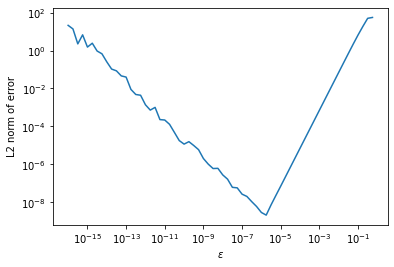

In [8]:
# Add your solution here

# initialize FE discretization
eps2 = np.power(10, np.arange(-16, 1, 0.25))

# create a Lambda function for exact gradient
calc_grad = lambda x : my_grad_exact(x)

# compute exact Hessian
hess_exact = my_hes_exact(x)

# intialize error
err = 0*eps2

# loop over different FE discretizations
for i in np.arange(len(eps2)):
    
    # calculate Hessian approximation
    H = my_hes_approx(x, calc_grad, eps2[i])
    
    # calculate error
    err[i] = np.linalg.norm(H - hess_exact)

# find optimal FE discretization
min_eps2 = eps2[int(np.where(err == min(err))[0])]
print('lowest error eps2:', min_eps2)

# plot
plt.loglog(eps2, err)
plt.ylabel('L2 norm of error')
plt.xlabel(r'$\varepsilon$')

### Final Answers

**Record your final answers below**:

A. Using $\epsilon_1 = $ ... gives error $|| \nabla f(x;\epsilon_1)_{approx} - \nabla f(x)_{exact} || = $ ...

B. Using $\epsilon_1 = $ ... and $\epsilon_2 = $ ... gives error $|| \nabla^2 f(x;\epsilon_1,\epsilon_2)_{approx} - \nabla^2 f(x)_{exact} || = $ ...

C. Using $\epsilon_2 = $ gives error $|| \nabla^2 f(x;\epsilon_2)_{approx} - \nabla^2 f(x)_{exact} || = $ ...

These answers were computed using the ... norm.

### Discussion

What is the benefit of using the *exact gradient* when approximating the Hessian with central finite difference?

**Answer:**

## Analysis of possible optimization solutions

Consider the following optimization problem:

$$\min f(x) := \left[x_1^2 + (x_2 + 1)^2\right] \cdot \left[x_1^2 + (x_2 - 1)^2\right]$$

Our optimization algorithm terminates at the following points:
1. $x = [0,0]^T$
2. $x = [0,1]^T$
3. $x = [0,-1]^T$
4. $x = [1,1]^T$

Classify each point.

You may solve this problem entirely on paper, entirely in Python, or some combination. Please record your answer below. (If you solve on paper, you can typeset the justification in 1 or 2 sentences.)

**Suggested solution approach: define systematic analysis routine**

Create a function that:
1. Evaluates $f(x)$, $\nabla f(x)$, and $\nabla^2 f(x)$ for a given $x$
2. Calculates eigenvalues of $\nabla^2 f(x)$

We then reuse this function to analyze each point.

In [9]:
# Add your solution here

### Point 1

In [10]:
# Add your solution here

**Answer**:

### Point 2

In [11]:
# Add your solution here

**Answer**:

### Point 3

In [12]:
# Add your solution here

**Answer**:

### Point 4

In [13]:
# Add your solution here

**Answer**:

### Visualize in 3D

Plot $f(x)$ in 3D over the domain $x_1 \in [-1.1,1.1]$ and $x_2 \in [-1.5, 1.5]$.

In [14]:
# Add your solution here

### Convexity


Is $f(x)$ convex? Did you need to make the plot to make this determination? Write a sentence or two to justify your answer.

**Answer**:

## Multivariable Taylor Series

You will use `my_grad_exact`, `my_grad_approx`, `my_hes_exact`, and `my_hes_approx` to construct Taylor series approximations to an arbitrary twice differentiable continuous functions with inputs $x \in \mathbb{R}^2$. We will then consider Example 2.19 and visualize the Taylor series approximation in 3D.


### Create a function to plot the first order Taylor series using $\nabla f$

Create a general function that:
1. Constructs a Taylor series using $\nabla f$ centered around a given point
2. Plots the true function and Taylor series approximation


In [15]:
def taylor1(xc, f, grad, dx):
    '''
    Constructs a Taylor series using first derivates and visualizes in 3D
    
    Arguments:
        xc - point to center Taylor series
        f - function that computes function value. Only has one input (x)
        grad - function that computes gradient. Only has one input (x)
        dx - list or numpy array. creates 3D plot over xc[0] +/- dx[0], xc[1] +/- dx[1]
    
    Returns:
        none
        
    Actions:
        3D plot
    
    '''
    
    # Add your solution here

### Taylor Series using `my_grad_approx`

Consider $x_c = [0.7, 0.3]^T$ (center of Taylor series) and $\Delta x = [0.5, 0.5]^T$ (domain for plot).

In [16]:
# Specify epsilon1
calc_grad = lambda x : my_grad_approx(x,my_f,1E-6)

# Specify dx
dx = [0.5, 0.5]

# Specify xc
xc = np.array([0.7, 0.3])

taylor1(xc, my_f, calc_grad, dx)

### Taylor Series using `my_grad_exact`

Consider $x_c = [0.7, 0.3]^T$ (center of Taylor series) and $\Delta x = [0.5, 0.5]^T$ (domain for plot).

In [17]:
# Specify epsilon1
calc_grad = lambda x : my_grad_exact(x)

# Specify dx
dx = [0.5, 0.5]

# Specify xc
xc = np.array([0.7, 0.3])

taylor1(xc, my_f, calc_grad, dx)

### Create a function to plot the second order Taylor series using $\nabla f$ and $\nabla^2 f$

In [18]:
def taylor2(xc, f, grad, hes, dx):
    '''
    Constructs a Taylor series using first derivates and visualizes in 3D
    
    Inputs:
        xc - point to center Taylor series
        f - computes function value. Only has one input (x)
        grad - computes gradient. Only has one input (x)
        hes - computes the Hessian. Only has one input (x)
        dx - creates 3D plot over xc[0] +/- dx[0], xc[1] +/- dx[1]
    
    Outputs:
        none
        
    Creates:
        3D plot
    
    '''
    
    ### Evaluates function and gradiant
    fval = f(xc)
    gval = grad(xc)
    Hval = hes(xc)
    
    ### Creates domain for plotting
    x1 = np.arange(xc[0] - dx[0],xc[0] + dx[0],dx[0]/100)
    x2 = np.arange(xc[1] - dx[1],xc[1] + dx[1],dx[1]/100)
    
    ## Create a matrix of all points to sample
    X1, X2 = np.meshgrid(x1, x2)
    n1 = len(x1)
    n2 = len(x2)

    ## Allocate matrix for true function value
    F = np.zeros([n2, n1])

    ## Allocate matrix for Taylor series approximation
    T = np.zeros([n2, n1])    
    
    xtemp = np.zeros(2)

    # Evaluate f(x) and Taylor series over grid
    for i in range(0,n1):
        xtemp[0] = x1[i]
        for j in range(0,n2):
            xtemp[1] = x2[j]
            
            # Evaluate f(x)
            F[j,i] = my_f(xtemp)

            # Evaluate Taylor series
            dx_ = xtemp - xc
            
            '''
            print("dx = ",dx)
            print("gval = ",gval)
            print("Hval = ",Hval)
            '''
            
            temp = Hval.dot(dx_)
            # print("Hval * dx = ",temp)
            
            
            # T[j,i] = fval + gval.dot(dx_) + 0.5*(temp).dot(dx_)
            T[j,i] = fval + gval.dot(dx_) + 0.5*(dx_.dot(Hval.dot(dx_)))
            
    # Create 3D figure
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot f(x)
    surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True,label="f(x)")

    # Plot Taylor series approximation
    surf = ax.plot_surface(X1, X2, T, linewidth=0,cmap=cm.PiYG,antialiased=True,label="Taylor series")
    
    # Add candidate point
    ax.scatter(xc[0],xc[1],fval,s=50,color="black",depthshade=True)

    # Draw vertical line through stationary point to help visualization
    # Maximum value in array
    fmax = np.amax(F)
    fmin = np.amin(F)
    ax.plot([xc[0], xc[0]], [xc[1], xc[1]], [fmin,fmax],color="black")
    
    plt.show()

### Taylor series using `my_grad_approx` and `my_hes_approx`

Consider $x_c = [0.7, 0.3]^T$ (center of Taylor series) and $\Delta x = [0.2, 0.2]^T$ (domain for plot).

/tmp/ipykernel_67960/2102936551.py:69: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


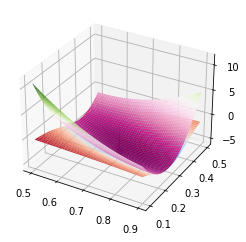

In [19]:
# Specify epsilon1
calc_grad = lambda x : my_grad_approx(x,my_f,1E-6)

# Specify epsilon2
calc_hes = lambda x : my_hes_approx(x, calc_grad, 1E-6)

# Specify dx
dx = [0.2, 0.2]

# Specify xc
xc = np.array([0.7, 0.3])

taylor2(xc, my_f, calc_grad, calc_hes, dx)

### Taylor series using `my_grad_exact` and `my_hes_exact`

Consider $x_c = [0.7, 0.3]^T$ (center of Taylor series) and $\Delta x = [0.2, 0.2]^T$ (domain for plot).

/tmp/ipykernel_67960/2102936551.py:69: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


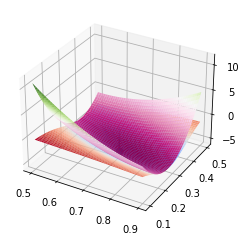

In [20]:
x = np.array([0,0])
# Specify epsilon1
calc_grad = lambda x : my_grad_exact(x)

# Specify epsilon2
calc_hes = lambda x1 : my_hes_exact(x1)

# Specify dx
dx = [0.2, 0.2]

# Specify xc
xc = np.array([0.7, 0.3])

taylor2(xc, my_f, calc_grad, calc_hes, dx)

### Discussion

Write 1 or 2 sentences to describe the the shapes for the first order and second order Taylor series approximations? Why do these shapes make sense?

**Answer:**

Is there a visible difference in the Taylor series approximations using the finite difference versus exact derivatives? Why does this make sense?

**Answer**: